## INF250 Mandatory 2

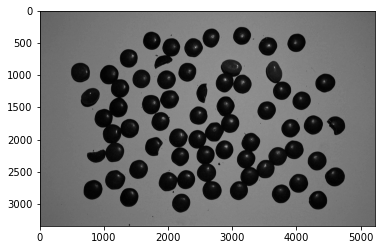

In [23]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from skimage import filters, morphology, segmentation
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage import measure
import math

filepath = "../images/IMG_2754_nonstop_alltogether.JPG"
image = io.imread(filepath)
image = image[:,:,2] #Using the blue channel of the image.
image = image[200:-200, 200:-200] # Crop image to remove noisy borders.
plt.imshow(image, cmap='gray')


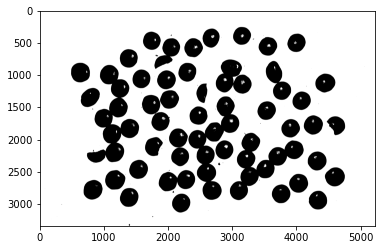

In [4]:
# Otsu threshold
thresh = filters.threshold_otsu(image)
otsu_im = image > thresh
plt.imshow(otsu_im, cmap='gray')


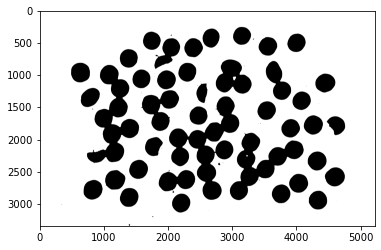

In [10]:
# Opening

closed_im = morphology.opening(otsu_im, morphology.square(20))
plt.imshow(closed_im, cmap='gray')

[[ 1  1  1 ...  7  7  7]
 [ 1  1  1 ...  7  7  7]
 [ 1  1  1 ...  7  7  7]
 ...
 [28 28 28 ... 40 40 40]
 [28 28 28 ... 40 40 40]
 [28 28 28 ... 40 40 40]]


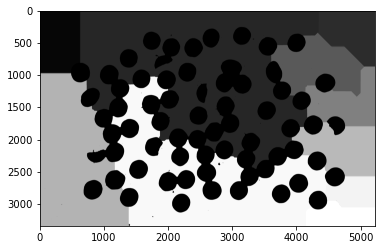

In [40]:
# Watershed

# Watershed
distance = ndi.distance_transform_edt(closed_im)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=closed_im, min_distance=3, num_peaks=40)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = segmentation.watershed(-distance, markers, mask=closed_im)
plt.imshow(labels, cmap='gray')
print(labels)

Object    Circularity
object 0: 0.10732486773790686
object 1: 0.04047437682930507
object 2: 0.6940833933630842
object 3: 0.015727524744086147
object 4: 0.015727524744086147
object 5: 0.015727524744086147
object 6: 0.015727524744086147
object 7: 0.3803730141314026
object 8: 0.06017032619518577
object 9: 0.046004094976042936
object 10: 0.06014276277654648
object 11: 0.06014276277654648
object 12: 0.046004094976042936
object 13: 0.06014276277654648
object 14: 0.1429473175307287
object 15: 0.026344133199849903
object 16: 0.026344133199849903
object 17: 0.20532747534820767
object 18: 0.026344133199849903
object 19: 0.026344133199849903
object 20: 0.026344133199849903
object 21: 0.0567942035164963
object 22: 0.07032328464407717
object 23: 0.027436971757249233
object 24: 0.027436971757249233
object 25: 0.027436971757249233
object 26: 0.027436971757249233
object 27: 0.027436971757249233
object 28: 0.027436971757249233
object 29: 0.027436971757249233
object 30: 0.027140687140273942
object 31: 0

(array([33.,  3.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([0.01572752, 0.08356311, 0.1513987 , 0.21923429, 0.28706987,
        0.35490546, 0.42274105, 0.49057663, 0.55841222, 0.62624781,
        0.69408339]),
 <BarContainer object of 10 artists>)

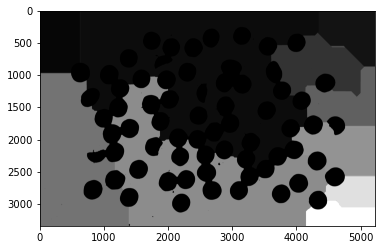

In [46]:
# Measure

labels2 = measure.label(labels)
plt.imshow(labels2, cmap='gray')
properties = measure.regionprops(labels2)

print('Object    Circularity')
circularity = [4*math.pi*prop.area/prop.perimeter**2 for prop in properties]
for ix, prop in enumerate(properties):
    if prop.perimeter != 0:
        print(f'object {ix}: {4*math.pi*prop.area/prop.perimeter**2}')
        

plt.hist(circularity, bins=10)

# the circularity doesn't make sense, should be close to 1 for circular objects, and what I get is closer to
# zero, I think maybe it's measuring the background. 

